In [183]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt

In [184]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
Náš expertní odhad pro náhodnou veličinou s Poissonovým rozdělením je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

<!--
Máme náhodnou veličinu s Poissonovým rozdělením a expertní odhad, že každých 5 ms by mělo nastat 10 připojení. Expertní odhad můžeme reformulovat na znění, že průměrná doba mezi dvěma připojeními je 0.5 ms. Pak tento odhad odpovídá exponenciálnímu rozdělení s parametrem $\lambda = 2$. Dle Wikipedia je pro Poissonovo rozdělení vhodným konjugovaným apriorním rozdělením Gamma rozdělení. Hustota pravděpodobnosti (pdf) Gamma rozdělení je dána vztahem:
$$
pdf(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
$$
a vztah pto hustotu pravděpodobnosti expertního odhadu je následující:
$$
pdf(x) = \lambda e^{-\lambda x}.
$$
Pro parametry $\alpha$ a $\beta$ bude zřejmě platit následující, abychom mohli použít Gamma rozdělení jako konjugované apriorní rozdělení:
* $x^{\alpha - 1} = 1$, tzn., $\alpha - 1 = 0$ a tím pádem $\alpha = 1$
* $e^{-\beta x} = e^{-\lambda x}$, čili $\beta = \lambda$
* zbylé hodnoty jsou pouze multiplikativní konstanty, které nemají na polohu maxima vliv.

Správnost volby konjugovaného apriorního rozdělení pak ověříme graficky.
>

### Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme jako hustotu Gamma rozdělení s parametry viz výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=10 + \sum^{n}_{i=1} x_i$ a $\beta=5+n$

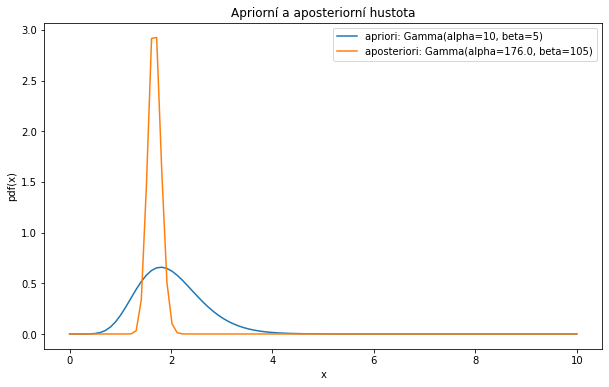

In [185]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_apriori, label=f"apriori: Gamma(alpha={alpha_apriori}, beta={beta_apriori})")
plt.plot(x, y_aposteriori, label=f"aposteriori: Gamma(alpha={alpha_aposteriori}, beta={beta_aposteriori})")
plt.legend()
plt.show()

### Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\frac{\beta}{\beta+1}$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=\frac{\beta+n}{\beta+n+1}$

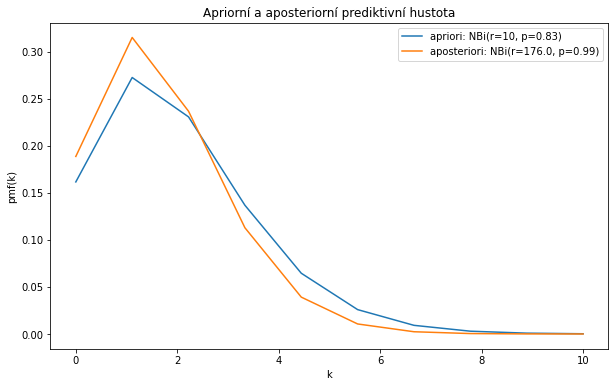

In [186]:
plt.figure(figsize=(10, 6))
k = np.linspace(0, 10, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
observations = np.array(df1["uloha_1 a)"].dropna().values)
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("pmf(k)")
plt.plot(k, y_apriori, label=f"apriori: NBi(r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)})")
plt.plot(k, y_aposteriori, label=f"aposteriori: NBi(r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)})")
plt.legend()
plt.show()

### Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2,5 a  97,5 percentily Gamma rozdělení s odpovídajícími parametry.
<!--
Interval spolehlivosti odhadu parametru $\lambda$ je roven $(\hat{\lambda}g_{1-\alpha/2}, \hat{\lambda}g_{\alpha/2})$, kde:
* $\hat{\lambda}$ je bodový odhad parametru $\lambda$,
* $1 - \alpha$ je hladina významnosti,
* $g_{k}$ je $k$-tý percentil Gamma rozdělení.

Apriorního i aposteriorní rozdělení se řídí Gamma rozdělením, tzn., bodové odhady jejich parametrů $\lambda$ jsou dány následovně:
$$
\hat{\lambda} = \frac{\alpha + \sum^{n}_{i=1} x_i}{\beta + n}.
$$
!>

In [187]:
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: {lambda_confidence_interval_apriori}")
print(f"Aposteriorní 95% interval spolehlivosti: {lambda_confidence_interval_aposteriori}")

Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.

### Výběr dvou aposteriorních bodových odhadů parametru $\lambda$
Prvně vybereme parametr $\lambda$ jako střední hodnotou aposteriorního Gamma rozdělení, tj. jeho Bayesovský bodový odhad:
$$
\lambda_1 \overset{odhad}{=} \frac{10 + 166}{5 + 100}=1,6762
$$
Jako druhý bodový odhad parametru $\lambda$ zvolíme modus aposteriorního Gamma rozdělení:
$$\lambda_2 \overset{odhad}{=} \frac{10+166-1}{5+100} = 1,6667$$ 

Pokud bychom následně prováděli další sady pozorování, v průměru bychom se měli blížit k odhadu parametru $\lambda = 1,6762$ ($1,6762$ připojení za 1 ms), nejčastěji však bude odhad $\lambda = 1,6667$ ($1,6667$ připojení za 1 ms) pro danou sadu. 

### Výběr apriorního a aposteriorního bodového odhadu počtu pozorování


In [188]:
observations_apriori = alpha_apriori * (1 - beta_apriori / (beta_apriori + 1)) / (beta_apriori / (beta_apriori + 1))
observations_aposteriori = alpha_aposteriori * (1 - beta_aposteriori / (beta_aposteriori + 1)) / (beta_aposteriori / (beta_aposteriori + 1))

print(f"Apriorní očekávaný počet pozorování: {observations_apriori}")
print(f"Aposteriorní očekávaný počet pozorování: {observations_aposteriori}")

Apriorní očekávaný počet pozorování: 1.9999999999999996
Aposteriorní očekávaný počet pozorování: 1.6761904761904758


Jako oba výběry zvolíme střední hodnoty negativních binomických rozdělení s odpovídajícími parametry, tj.:
$$počet\_pozorování_{apriori}=\frac{10 \cdot (1-0.83)}{0.83}=2,0$$
$$počet\_pozorování_{aposteriori}=\frac{176 \cdot (1-0.99)}{0.99}=1,6762$$

Z vybraných odhadů lze vidět, že pozorováním se poměrně významně posunul průměrný odhad počtu připojení za 1 ms z původního expertního odhadu.

## b) Aproximace diskrétním rozdělením

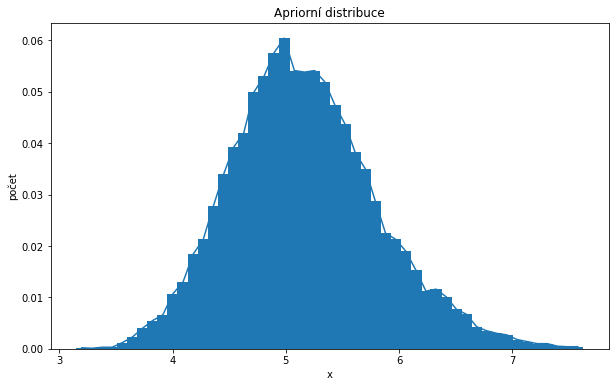

dict_keys([3.19769042567099, 3.2871014378359247, 3.3765124500008588, 3.465923462165793, 3.5553344743307274, 3.644745486495662, 3.734156498660596, 3.82356751082553, 3.9129785229904646, 4.002389535155399, 4.091800547320333, 4.181211559485267, 4.270622571650202, 4.360033583815136, 4.44944459598007, 4.538855608145004, 4.6282666203099385, 4.7176776324748735, 4.807088644639808, 4.896499656804742, 4.985910668969677, 5.075321681134611, 5.164732693299545, 5.254143705464479, 5.343554717629413, 5.432965729794347, 5.522376741959282, 5.611787754124217, 5.701198766289151, 5.790609778454085, 5.880020790619019, 5.969431802783953, 6.058842814948887, 6.148253827113821, 6.237664839278756, 6.327075851443691, 6.416486863608625, 6.5058978757735595, 6.595308887938494, 6.684719900103428, 6.774130912268362, 6.863541924433296, 6.952952936598231, 7.042363948763166, 7.1317749609281, 7.221185973093034, 7.310596985257968, 7.400007997422902, 7.489419009587836, 7.57883002175277])


In [208]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
values = df_prior.values.flatten()
values.sort()

i_values = 0
prior_hist = np.zeros(50)
for i, x in enumerate(np.linspace(values[1], values[-1], 50)):
    while i_values < values.shape[0] and values[i_values] <= x:
        i_values += 1
        prior_hist[i] += 1

prior_hist = prior_hist / values.shape[0]

i_values = 0
prior_probs_dict = {}
previous = values[0]
for i, x in enumerate(np.linspace(values[1], values[-1], 50)):
    prior_probs_dict[previous + (x - previous)] = prior_hist[i]
    previous = x

plt.figure(figsize=(10, 6))
plt.title("Apriorní distribuce")
plt.xlabel("x")
plt.ylabel("počet")
plt.plot(np.linspace(values[1], values[-1], 50), prior_hist)
plt.bar(prior_probs_dict.keys(), prior_probs_dict.values(), width=0.1)
plt.show()
print(prior_probs_dict.keys())

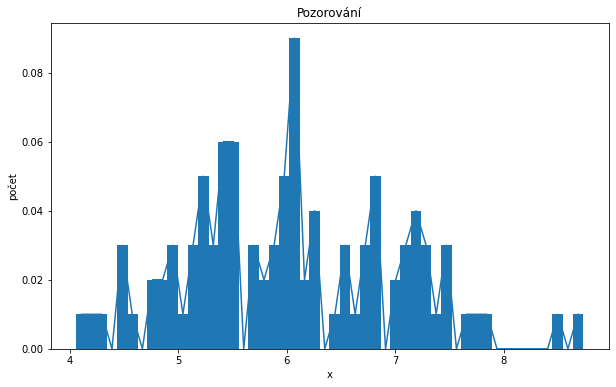

In [209]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations.sort()

i_values = 0
observation_hist = np.zeros(50)
for i, x in enumerate(np.linspace(observations[0], observations[-1], 50)):
    while i_values < observations.shape[0] and observations[i_values] <= x:
        i_values += 1
        observation_hist[i] += 1
    
observation_hist = observation_hist / observations.shape[0]

i_values = 0
observation_probs_dict = {}
previous = observations[0]
for i, x in enumerate(np.linspace(observations[1], observations[-1], 50)):
    observation_probs_dict[previous + (x - previous)] = observation_hist[i]
    previous = x

plt.figure(figsize=(10, 6))
plt.title("Pozorování")
plt.xlabel("x")
plt.ylabel("počet")
plt.plot(np.linspace(observations[1], observations[-1], 50), observation_hist)
plt.bar(np.linspace(observations[1], observations[-1], 50), observation_hist, width=0.1)
plt.show()
